# Introduksjon til trær

Trær kan brukes til både klassifikasjon og regresjon. Generelt går metodene ut på å gjentatte ganger dele opp dataene langs aksene.

Vi starter med hele datasettet som en region. Deretter deler vi opp langs en av aksene på den "beste" måten, altså den delingen som gjør at feilen blir så liten som mulig. Deretter foregår delingene ved at vi finner den regionen og oppdelinen av den som igjen minimerer feil. Dette fortsetter helt til vi når en betingelse vi har satt. Dette kan for eksempel være at ingen av regionene inneholder fler enn et visst antall datapunkter.

Vi ender opp med et besluttningstre. Dette er noe som minner om et flytskjema. For å predikere et nytt datapunkt, begynner vi på toppen, og svarer på spørsmål helt til vi når en av de ytterste nodene (løvnodene).

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.datasets import make_blobs
from useful_tools import plot_boundary

from IPython.display import Image

## Klassifikasjon

Nedenfor ser vi tilpassningen av et klassifikasjonstre med fire løvnoder. Husk a

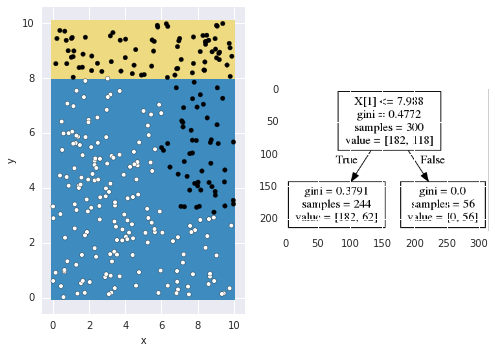

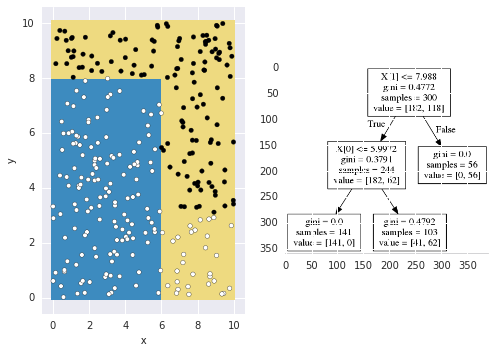

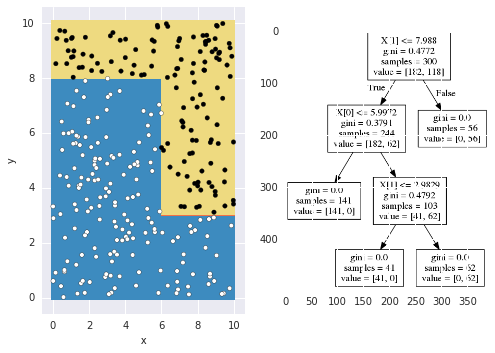

In [134]:
X = np.random.uniform(0, 10, (300, 2))
classes = np.greater(X[:,0], 6).astype(int)
classes = np.logical_and(np.greater(X[:,1], 3), classes)
classes = np.logical_or(np.greater(X[:,1], 8), classes)

for i in range(2, 5):
    tree = DecisionTreeClassifier(max_leaf_nodes=i)
    tree.fit(X, classes)
    export_graphviz(tree, out_file='tree_{}'.format(i))
    plt.subplot(121)
    plot_boundary(X, tree)
    plt.scatter(X[:,0], X[:,1], c=classes)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(122)
    plt.imshow(plt.imread('trees/tree_{}.png'.format(i)))
    plt.show()

Vi ser at vi først splitter ved y=8. Deretter blir det blå området splittet ved x=6. Til slutt splitter vi ved y=6. Legg merke til at det kun er den høyre gruppen fra forrige splitt som ble delt opp.

Når vi har et klassifikasjonsproblem, vil vi klassifisere punkter som havner i en gruppe til å være den klassen som forekommer flest ganger i den gruppen.

## Lineære grenser
Trær ser ut til å fungere godt i eksempelet ovenfor, men hva skjer hvis grensene ikke er vinkelrette på aksene?

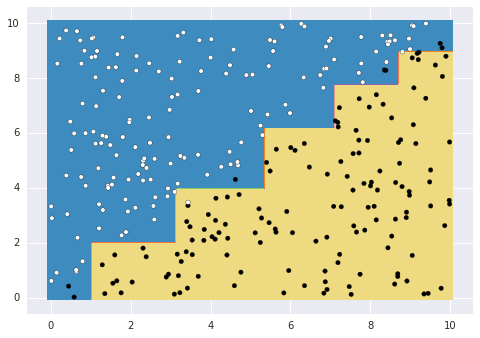

In [135]:
classes = np.greater(X[:,0], X[:,1])

tree_linear = DecisionTreeClassifier(min_samples_leaf=5)
tree_linear.fit(X, classes)

plot_boundary(X, tree_linear)
plt.scatter(X[:,0], X[:,1], c=classes)
plt.show()

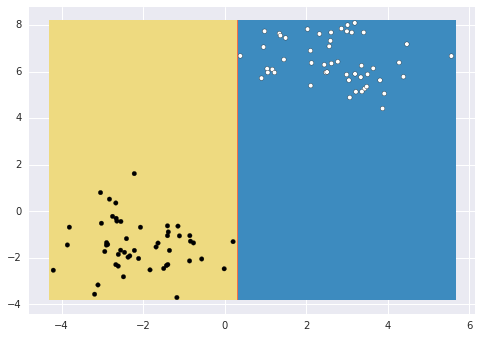

In [136]:
x, y = make_blobs(centers=2)

tree_blob = DecisionTreeClassifier(min_samples_leaf=5)
tree_blob.fit(x, y)

plot_boundary(x, tree_blob)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()


## Regresjon

Å tilpasse et regresjonstre er nesten det samme som å tilpasse et klassifiseringstre. Forskjellene er at vi med et regresjonstre ønsker å minimerer summen av treningsfeil, i motsetning til å minimiere feilrate, som med klassifikasjonstrær. I tillegg er det annerledes når vi predikerer. Dersom et datapunkt havner i en gruppe, vil verdien predikeres til det som er gjennomsnittet til de andre datapunktene i gruppa.

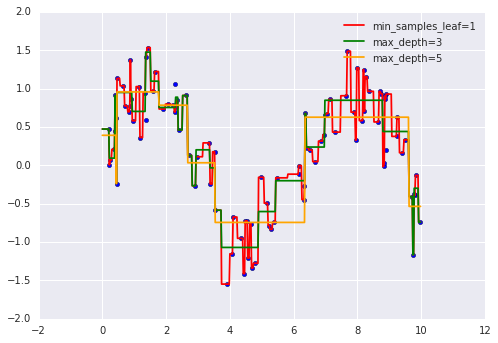

In [191]:
num_points = 100
x = np.random.uniform(0, 10, num_points).reshape(-1, 1)
y = np.sin(x).ravel() + np.random.normal(scale=0.4, size=num_points)

tree_reg_1 = DecisionTreeRegressor()
tree_reg_2 = DecisionTreeRegressor(max_depth=5)
tree_reg_3 = DecisionTreeRegressor(max_depth=3)

for tree, color in zip((tree_reg_1, tree_reg_2, tree_reg_3), ('red', 'green', 'orange')):
    tree.fit(x, y)

    x_test = np.arange(0, 10, 0.02)[:, np.newaxis]
    y_test = tree.predict(x_test)

    plt.plot(x_test, y_test, color=color)
plt.scatter(x, y)
plt.legend(('min_samples_leaf=1', 'max_depth=3', 'max_depth=5'))
plt.show()

Som vi kan se, er det veldig lett å overtilpasse. Det kan derfor være lurt å justere parameterne til treet. For eksempel kan man sette begrensninger med dybden til treet (`max_depth`) eller kreve et større antall noder i hver løvnode (`min_samples_leaf`).